In [1]:
import wandb
import pandas

In [2]:
api = wandb.Api()
runs = api.runs("saleml/off_policy_gflownets")

In [3]:
interesting_runs = []
for run in runs:
    if 'best' in run.name:
        interesting_runs.append(run)
        # run.file("model.pt").download(replace=True)

In [9]:
interesting_runs[0].history()[['states_visited', 'jsd', 'modes_found']]

,states_visited,jsd,modes_found
0,64,NaN,1
1,6464,0.306398,2
2,12864,0.28868,2
3,19264,0.24542,2
4,25664,0.23758,2
...,...,...,...
76,486464,0.002435,4
77,492864,0.002453,4
78,499264,0.002447,4
79,505664,0.002474,4


In [10]:
[run.name for run in interesting_runs]

['best-on-policy-rws',
 'best-on-policy-forward-kl',
 'best-on-policy-reverse-rws',
 'best-on-policy-reverse-kl',
 'best-on-policy-tb',
 'best-on-policy-modified-db',
 'best-off-policy-tb']

In [8]:
pandas.concat([run.history()[['jsd', 'modes_found']] for run in interesting_runs], axis=1)

,jsd,modes_found,jsd,modes_found,jsd,modes_found,jsd,modes_found,jsd,modes_found,jsd,modes_found,jsd,modes_found
0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1,NaN,1.0,NaN,0.0
1,0.306398,2.0,0.379514,1.0,0.389871,1.0,0.437231,1.0,0.409996,1,0.405466,1.0,0.526402,0.0
2,0.28868,2.0,0.323994,1.0,0.38409,1.0,0.432721,1.0,0.394559,1,0.380654,1.0,0.395692,0.0
3,0.24542,2.0,0.245338,1.0,0.38176,1.0,0.40868,1.0,0.370306,1,0.371884,1.0,0.342722,1.0
4,0.23758,2.0,0.102749,3.0,0.381115,1.0,0.401884,1.0,0.360348,1,0.367676,1.0,0.273531,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000759,4,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000825,4,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000825,4,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000743,4,NaN,NaN,NaN,NaN


In [11]:
def rename_columns_and_concat(dfs, names, columns):
    for df, name in zip(dfs, names):
        df.columns = [name + '_' + col for col in columns]
    return pandas.concat(dfs, axis=1)

In [13]:
df = rename_columns_and_concat([run.history()[['states_visited', 'jsd', 'modes_found']] for run in interesting_runs],
 [run.name for run in interesting_runs],
  ['states_visited', 'jsd', 'modes_found'])

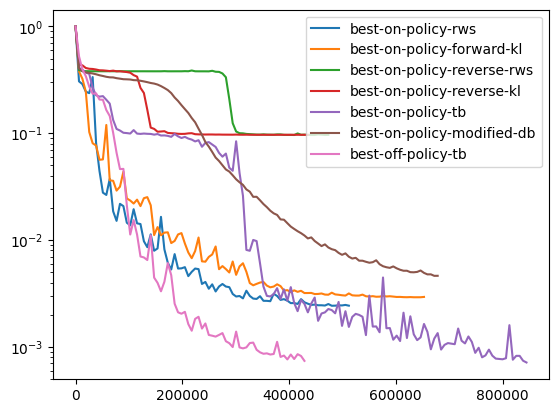

In [68]:
import matplotlib.pyplot as plt
for run in interesting_runs:
    plt.semilogy(run.history()['states_visited'], run.history()['jsd'].astype(float).fillna(1), label=run.name)
plt.legend()
plt.savefig('JSD_vs_n_trajectories.png')

In [18]:
run.history()['jsd'].astype(float).fillna(1)

0     1.000000
1     0.306398
2     0.288680
3     0.245420
4     0.237580
        ...   
76    0.002435
77    0.002453
78    0.002447
79    0.002474
80    0.002434
Name: jsd, Length: 81, dtype: float64

In [22]:
df.to_csv('wandb_data_23-09-12-38.csv')

In [26]:
dir(run.files())

['QUERY',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_page',
 'client',
 'convert_objects',
 'cursor',
 'index',
 'last_response',
 'length',
 'more',
 'next',
 'objects',
 'per_page',
 'run',
 'update_variables',
 'variables']

In [54]:
run.files()[len(run.files()) - 4].name

'media/images/P_T_700_1f384fd85acb19a0306b.png'

In [55]:
len(run.history()['P_T'])

68

In [66]:
for run in interesting_runs:
    iteration = max([int(x['path'].split('P_T_')[1].split('_')[0]) for x in run.history()['P_T'].values])
    print(run.name, iteration)
    for file in run.files():
        if 'P_T' in file.name and str(iteration) in file.name:
            file.download(replace=True)

8000
10200
7400
6800
13200
10600
6700


In [67]:
for run in interesting_runs:
    iteration = max([int(x['path'].split('P_T_')[1].split('_')[0]) for x in run.history()['P_T'].values])
    print(run.name, iteration)


best-on-policy-rws 8000
best-on-policy-forward-kl 10200
best-on-policy-reverse-rws 7400
best-on-policy-reverse-kl 6800
best-on-policy-tb 13200
best-on-policy-modified-db 10600
best-off-policy-tb 6700
